In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from preprocessing import delete_hot_pixels, d_norm, i_norm
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None


In [2]:
data = pd.read_excel("./data/data_merged_3.xlsx", index_col=0)
buf_dict = {}
buf_list = []
for x in data["IDcard"]:
    if x in buf_dict.keys():
        buf_list.append(f"{x}_{buf_dict[x]}")
        buf_dict[x] += 1
    else:
        buf_list.append(f"{x}_{1}")
        buf_dict[x] = 2
data["IDcard"] = pd.Series(buf_list)
data = data.set_index(keys=["GROUP", "IDcard"])
data.sample(5)

AGE     SEX PARKINSON       STAGE  \
GROUP      IDcard                                            
Parkinson  БП005(Л)_6   68.0  female       YES     3-stage   
Comparison C491223_4    84.0  female        NO  Comparison   
Parkinson  C196423_1    58.0    male       YES     3-stage   
           AK2531823_8  76.0  female       YES     1-stage   
Control    CG15_2       52.0  female        NO     Control   

                        PD_duration (years) курение   АГ   СД  ХПН Подагра  \
GROUP      IDcard                                                            
Parkinson  БП005(Л)_6                   NaN     нет  нет  нет  нет     нет   
Comparison C491223_4                    NaN     нет   да  нет   да     нет   
Parkinson  C196423_1                   12.0      да   да  NaN  нет     нет   
           AK2531823_8                  6.0     нет   да  нет  нет     нет   
Control    CG15_2                       NaN     NaN  NaN  NaN  NaN     NaN   

                        ... 803.694275 805.66482  807.635943  809.607641  \
GROUP      IDcard       ...                                                
Parkinson  БП005(Л)_6   ...         27        23          19          24   
Comparison C491223_4    ...         43        51          43          41   
Parkinson  C196423_1    ...         53        53          53          53   
           AK2531823_8  ...         29        34          29          22   
Control    CG15_2       ...         64        59          54          55   

                        811.579916  813.552766  815.526191  817.500191  \
GROUP      IDcard                                                        
Parkinson  БП005(Л)_6           25          32          27          19   
Comparison C491223_4            40          42          -1          36   
Parkinson  C196423_1            43          39          44          41   
           AK2531823_8          36          27          36          23   
Control    CG15_2               55          58          46          54   

                        819.474764  821.44991  
GROUP      IDcard                              
Parkinson  БП005(Л)_6           14         23  
Comparison C491223_4            33         25  
Parkinson  C196423_1            41         37  
           AK2531823_8          27         16  
Control    CG15_2               55         46  

[5 rows x 266 columns]

In [2]:
df_raw = pd.read_excel("./data/data_merged_3.xlsx", index_col=[0, 1, 2])

df_raw.head(5)

,,,SEX,GROUP,PARKINSON,STAGE,PD_duration (years),курение,АГ,СД,ХПН,Подагра,...,803.694275,805.66482,807.635943,809.607641,811.579916,813.552766,815.526191,817.500191,819.474764,821.44991
,IDcard,AGE,,,,,,,,,,,,,,,,,,,,,
0,CG1,NaN,male,Control,NO,Control,NaN,NaN,NaN,NaN,NaN,NaN,...,41,34,28,38,29,35,37,33,29,29
1,CG1,NaN,male,Control,NO,Control,NaN,NaN,NaN,NaN,NaN,NaN,...,32,33,31,39,25,30,21,16,31,22
2,CG1,NaN,male,Control,NO,Control,NaN,NaN,NaN,NaN,NaN,NaN,...,21,24,25,28,32,23,16,23,20,19
3,CG1,NaN,male,Control,NO,Control,NaN,NaN,NaN,NaN,NaN,NaN,...,33,18,22,25,18,17,36,22,24,25
4,CG1,NaN,male,Control,NO,Control,NaN,NaN,NaN,NaN,NaN,NaN,...,27,22,16,19,15,21,24,30,22,21


In [20]:
df_raw.columns[-47:-26]

Index([731.195121105382, 733.143905997501, 735.093289376216,  737.04327066511,
       738.993849287765, 740.945024667764, 742.896796228689, 744.849163394123,
       746.802125587648, 748.755682232848, 750.709832753305, 752.664576572601,
        754.61991311432, 756.575841802043, 758.532362059354, 760.489473309835,
       762.447174977069, 764.405466484637, 766.364347256124, 768.323816715112,
       770.283874285182],
      dtype='object')

In [27]:
df_1 = df_raw[df_raw.columns[-221:]].sample(1)

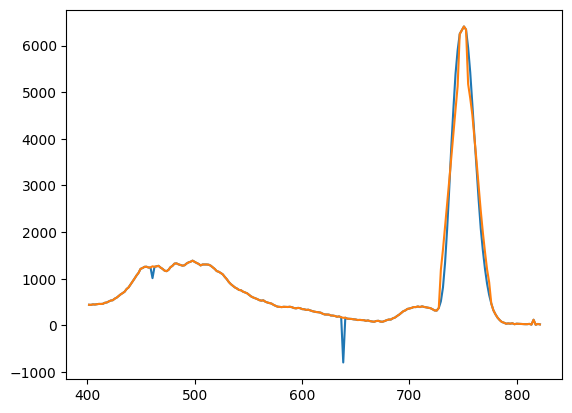

In [104]:
df_1 = df_raw[df_raw.columns[-221:]].sample(1)
x = df_1.columns.tolist()
plt.plot(x, df_1.loc[df_1.index[0]])
plt.plot(x, delete_hot_pixels(df_1.loc[df_1.index[0]].tolist(), q=0.9))

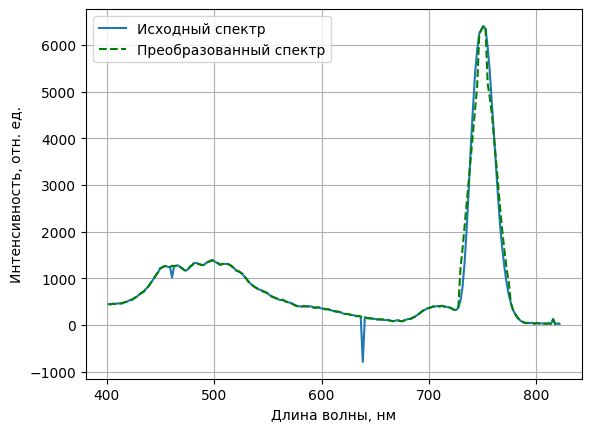

In [143]:
plt.plot(x, df_1.loc[df_1.index[0]])
plt.plot(x, delete_hot_pixels(df_1.loc[df_1.index[0]].tolist(), q=0.9), linestyle='--', color='green')
plt.xlabel("Длина волны, нм")
plt.ylabel("Интенсивность, отн. ед.")
plt.legend(["Исходный спектр", "Преобразованный спектр"])
plt.grid(True)

In [78]:
spec_hot = delete_hot_pixels(df_1.loc[df_1.index[0]].tolist(), q=0.9)
ser_hot = pd.Series(np.array(spec_hot), index=df_1.columns)

spec_d = d_norm(ser_hot)

In [124]:
from typing import Union
def d_normalize(data: Union[pd.Series, pd.DataFrame],
                laser_wave_left: float = 731.195121105382,
                laser_wave_right: float = 772.244519389919,
                cutoff_wave: float = 676.874469938485):
    if isinstance(data, pd.Series):
        data = data.loc[:cutoff_wave].div(
            data.loc[laser_wave_left:laser_wave_right].mean())
    else:
        data = data.loc[:, :cutoff_wave].div(
            data.loc[:, laser_wave_left:laser_wave_right].mean(axis=1),
            axis=0)
        data.rename(axis=1,
                    mapper=lambda x: f"D{int(x)}",
                    inplace=True)
    return data

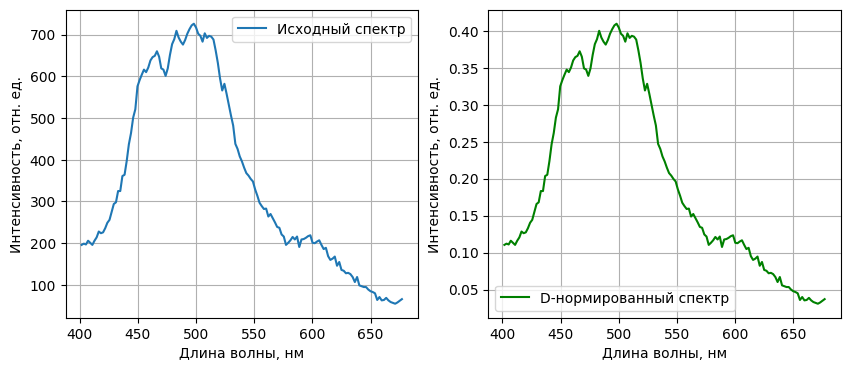

In [145]:
spec_d = d_normalize(ser_hot)
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(x[:147], spec_hot[:147])
ax[1].plot(x[:147], spec_d, color='green')
ax[0].set_xlabel("Длина волны, нм")
ax[0].set_ylabel("Интенсивность, отн. ед.")
ax[1].set_xlabel("Длина волны, нм")
ax[1].set_ylabel("Интенсивность, отн. ед.")
ax[0].legend(["Исходный спектр"])
ax[1].legend(["D-нормированный спектр"])
# plt.legend(["Исходный спектр", "Преобразованнный спектр"])
ax[0].grid(True)
ax[1].grid(True)

Удаление горячих пикселей

In [9]:
data_specs = data[data.columns[-221:].to_list()].copy()
laser_wave = 678.806263180468
cutoff_wave = 676.874469938485

for ind in data_specs.index:
    idx = data_specs.loc[ind].index
    data_specs.loc[ind].replace(to_replace=idx, value=delete_hot_pixels(data_specs.loc[ind].to_list()), inplace=True)
    

D-Нормировка

In [17]:
data_specs_d = d_norm(data_specs)
wavelength = data_specs_d.columns
data_specs_d = data_specs_d.rename(columns=dict([(x, f"D{int(np.floor(x))}") for x in data_specs_d.columns]))

I-нормировка

In [11]:
cols = data_specs_d.columns
names = list(set(data_specs_d.index.get_level_values("GROUP")))
i_df = i_norm(data_specs_d.loc[names[0], cols])
i_df = pd.concat([i_df, i_norm(data_specs_d.loc[names[1], cols])])
i_df = pd.concat([i_df, i_norm(data_specs_d.loc[names[2], cols])])
data_specs_i = data_specs_d.join(i_df, on="IDcard")

In [12]:
data_specs_i

D401      D403      D405      D407      D409  \
GROUP     IDcard                                                         
Control   CG1_1       0.429949  0.415618  0.448580  0.454313  0.454313   
          CG1_2       0.394105  0.411516  0.421012  0.419429  0.435257   
          CG1_3       0.387310  0.375419  0.395804  0.399201  0.409394   
          CG1_4       0.377452  0.372186  0.391497  0.373941  0.400275   
          CG1_5       0.361116  0.382675  0.384472  0.389861  0.398844   
...                        ...       ...       ...       ...       ...   
Parkinson БП007(П)_4  0.399589  0.413402  0.420309  0.435108  0.435108   
          БП007(П)_5  0.400590  0.417446  0.414471  0.432319  0.442235   
          БП007(П)_6  0.390591  0.395599  0.412625  0.426646  0.442670   
          БП007(П)_7  0.394252  0.406290  0.428360  0.429364  0.432373   
          БП007(П)_8  0.408528  0.410545  0.417606  0.431728  0.436772   

                          D410      D412      D414      D416      D418  ...  \
GROUP     IDcard                                                        ...   
Control   CG1_1       0.484409  0.487276  0.513073  0.518805  0.544602  ...   
          CG1_2       0.451084  0.457415  0.477991  0.492236  0.504898  ...   
          CG1_3       0.424682  0.439971  0.465452  0.480740  0.489234  ...   
          CG1_4       0.405542  0.430120  0.442409  0.461721  0.458210  ...   
          CG1_5       0.400641  0.445556  0.447352  0.456335  0.477895  ...   
...                        ...       ...       ...       ...       ...  ...   
Parkinson БП007(П)_4  0.460761  0.466681  0.489374  0.501213  0.530813  ...   
          БП007(П)_5  0.454134  0.475948  0.492805  0.513627  0.528501  ...   
          БП007(П)_6  0.452685  0.463702  0.484734  0.508770  0.529802  ...   
          БП007(П)_7  0.454443  0.462469  0.486545  0.501593  0.518647  ...   
          БП007(П)_8  0.448876  0.471068  0.484181  0.505364  0.529573  ...   

                          I659      I661      I663      I665      I667  \
GROUP     IDcard                                                         
Control   CG1_1       0.162155  0.146725  0.150032  0.142317  0.133500   
          CG1_2       0.158358  0.157105  0.144576  0.148335  0.128288   
          CG1_3       0.167908  0.162235  0.140959  0.150887  0.148051   
          CG1_4       0.171480  0.151769  0.147221  0.156318  0.139640   
          CG1_5       0.169657  0.157000  0.158582  0.136433  0.141179   
...                        ...       ...       ...       ...       ...   
Parkinson БП007(П)_4  0.103691  0.096881  0.101137  0.102840  0.096881   
          БП007(П)_5  0.113966  0.106218  0.112244  0.103636  0.094166   
          БП007(П)_6  0.106001  0.102497  0.095487  0.109506  0.102497   
          БП007(П)_7  0.104432  0.106193  0.100911  0.107073  0.101792   
          БП007(П)_8  0.118068  0.099456  0.112751  0.096797  0.105660   

                          I669      I671      I673      I674      I676  
GROUP     IDcard                                                        
Control   CG1_1       0.123580  0.125785  0.123580  0.121376  0.130193  
          CG1_2       0.130794  0.124530  0.125782  0.117012  0.125782  
          CG1_3       0.136704  0.114009  0.122520  0.133867  0.138122  
          CG1_4       0.135091  0.132059  0.135091  0.133575  0.147221  
          CG1_5       0.131687  0.120612  0.114284  0.117448  0.136433  
...                        ...       ...       ...       ...       ...  
Parkinson БП007(П)_4  0.089219  0.091773  0.084111  0.085814  0.079854  
          БП007(П)_5  0.084696  0.083836  0.087279  0.083836  0.094166  
          БП007(П)_6  0.094611  0.085850  0.082345  0.084098  0.088478  
          БП007(П)_7  0.094749  0.069221  0.092108  0.080665  0.091228  
          БП007(П)_8  0.089707  0.087048  0.088821  0.085276  0.089707  

[512 rows x 294 columns]

Визуализация

In [13]:
def sigma_1(x, mean):
    N = len(mean)
    return (np.sum((x - mean) ** 2, axis=0) / N) ** 0.5

<ErrorbarContainer object of 3 artists>

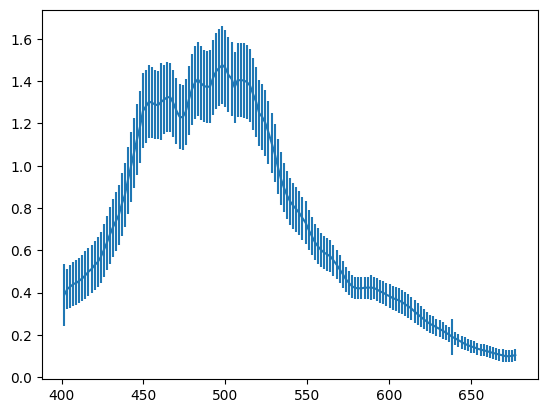

In [18]:
ind1 = "I401"
ind2 = "I676"
mean = data_specs_i.loc[:, ind1:ind2].mean().to_numpy()
yerr = sigma_1(data_specs_i.loc[:, ind1:ind2].to_numpy(), mean)
plt.errorbar(wavelength, mean, yerr=yerr)

In [19]:
data_specs_i.to_excel("./data/data_processed.xlsx")